In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats.stats import pearsonr

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

import geopandas as gpd
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, CategoricalColorMapper
from bokeh.palettes import brewer

# Analysing medical data to help improve society's quality of life

How can we use medical data to help improve society's quality of life?<br>
There is endless types of medical data out there for different diseases, which data should we use in order to help as many people as possible?<br>

To explore this question, we have subdivided it into some more specific areas that can gain us different types of information. They are shown in this scheme.

![title](Images/scheme.png)

# 1. Which diseases have the most significant negative impact on society's quality of life as of today? How does differ between countries and over time?
The ***prevelance*** of the disease alone is not enough to quantify this, take herpes for example. The herpes simplex virus is one of the most common diseases on earth. It is estimated that well over 50% of the world population is infected with the virus. However, most people are completely unaware that they are and show little to no symptoms while others do have severe symptoms. There is no cure and once you are infected, the virus will most likely stay in your body for the rest of your life.<br> 
***Conclusion:*** quality of life is only significantly effected if the disease causes pain or limits the patient ablilities.

The most severe effect of a disease is when it causes death, after all, you can't have any "quality of life" anymore if your life has come to an end. <br> 
***Conclusion:*** If we want to have a big impact on society's quality of life it might be interesting to look at the diseases that cause the most deaths.

## 1.1 Most common causes of death

We start by loading data from the GBD dataset, which contains the number of deaths from different causes, for different countries, from the year 1990 to 2017.

In [4]:
data=pd.read_csv("data/annual-number-of-deaths-by-cause.csv" )
print(data.shape)
data.head(5)

(6686, 36)


Entity Code  Year  Dementia  Cardiovascular diseases  Kidney disease  \
0  Afghanistan  AFG  1990     856.0                  28372.0          2708.0   
1  Afghanistan  AFG  1991     908.0                  30368.0          2851.0   
2  Afghanistan  AFG  1992     970.0                  33035.0          3057.0   
3  Afghanistan  AFG  1993    1066.0                  36512.0          3329.0   
4  Afghanistan  AFG  1994    1161.0                  40285.0          3641.0   

   Respiratory disease  Liver disease  Diabetes, blood and endocrine disease  \
0               3394.0         1349.0                                 6177.0   
1               3641.0         1443.0                                 6522.0   
2               3967.0         1572.0                                 7009.0   
3               4398.0         1735.0                                 7655.0   
4               4870.0         1911.0                                 8377.0   

   Digestive disease  ...  Heat-related deaths (hot or cold exposure)  \
0             1708.0  ...                                       222.0   
1             1792.0  ...                                       230.0   
2             1911.0  ...                                       250.0   
3             2071.0  ...                                       289.0   
4             2243.0  ...                                       315.0   

   Nutritional deficiencies  Suicide  Execution  Meningitis (deaths)  \
0                     567.0    703.0        NaN          6469.977091   
1                     588.0    754.0        NaN          6347.158764   
2                     623.0    820.0        NaN          6659.741428   
3                     674.0    894.0        NaN          8068.386263   
4                     731.0    977.0        NaN          9432.845127   

   Lower respiratory infections (deaths)  \
0                           22836.912346   
1                           22325.633931   
2                           23205.280750   
3                           28229.715397   
4                           32652.297630   

   Intestinal infectious diseases (deaths)  \
0                               295.382207   
1                               303.866598   
2                               317.750121   
3                               333.978331   
4                               348.419085   

   Protein-energy malnutrition (deaths)  Conflict (deaths)  Terrorism (deaths)  
0                           1607.703797             1508.0                12.0  
1                           1558.132316             3498.0                68.0  
2                           1617.721576             4341.0                49.0  
3                           1931.808553                NaN                 NaN  
4                           2351.629206             9090.0                22.0  

[5 rows x 36 columns]

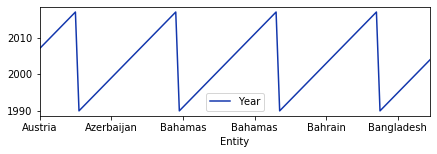

In [135]:
# For each "Entity" the year ranges from 1990 to 2017
data[380:490].plot(x='Entity',y='Year',color='#1337AD', figsize = (7,2))

# One of the entities is "world" which contains the summations over all countries. 
# Let's see which diseases are most prevalent world wide
df = data[data["Entity"]=='World'].iloc[:,2:].sort_values(6572, ascending=False, axis=1)

In [139]:
df

Cardiovascular diseases    Cancers  Respiratory disease  \
6546               12334351.0  5700044.0            3289518.0   
6547               12501972.0  5809813.0            3335799.0   
6548               12795069.0  5955812.0            3422152.0   
6549               13225897.0  6132271.0            3509371.0   
6550               13553332.0  6287064.0            3582124.0   
6551               13717727.0  6396818.0            3621689.0   
6552               13765966.0  6476175.0            3644792.0   
6553               13843602.0  6565474.0            3665237.0   
6554               13980264.0  6677612.0            3688493.0   
6555               14300291.0  6826126.0            3685035.0   
6556               14560300.0  6968120.0            3670648.0   
6557               14792079.0  7094636.0            3648128.0   
6558               15077694.0  7229219.0            3637346.0   
6559               15171726.0  7315976.0            3531763.0   
6560               15228086.0  7406392.0            3454214.0   
6561               15438944.0  7532723.0            3415164.0   
6562               15417554.0  7580477.0            3355947.0   
6563               15533852.0  7669828.0            3322669.0   
6564               15741659.0  7785325.0            3308707.0   
6565               15895001.0  7902787.0            3322680.0   
6566               16147816.0  8035287.0            3343205.0   
6567               16262696.0  8132517.0            3331596.0   
6568               16497999.0  8261969.0            3328130.0   
6569               16705683.0  8410195.0            3365324.0   
6570               16983293.0  8583993.0            3419384.0   
6571               17273017.0  8752758.0            3469784.0   
6572               17646585.0  8927401.0            3542290.0   
6573                      NaN        NaN                  NaN   

      Diabetes, blood and endocrine disease  \
6546                              1599080.0   
6547                              1638315.0   
6548                              1689665.0   
6549                              1746780.0   
6550                              1804262.0   
6551                              1859990.0   
6552                              1907175.0   
6553                              1960281.0   
6554                              2016698.0   
6555                              2080663.0   
6556                              2137742.0   
6557                              2193246.0   
6558                              2257089.0   
6559                              2313609.0   
6560                              2365260.0   
6561                              2434260.0   
6562                              2485621.0   
6563                              2541141.0   
6564                              2607210.0   
6565                              2674227.0   
6566                              2747438.0   
6567                              2810964.0   
6568                              2888895.0   
6569                              2964919.0   
6570                              3045480.0   
6571                              3116364.0   
6572                              3191129.0   
6573                                    NaN   

      Lower respiratory infections (deaths)   Dementia  Neonatal deaths  \
6546                           3.415941e+06   959208.0        2927283.0   
6547                           3.387086e+06   992223.0        2886770.0   
6548                           3.354599e+06  1026182.0        2842181.0   
6549                           3.316737e+06  1063224.0        2795805.0   
6550                           3.269526e+06  1099730.0        2753695.0   
6551                           3.228872e+06  1137501.0        2712771.0   
6552                           3.174943e+06  1173818.0        2671308.0   
6553                           3.137364e+06  1210936.0        2628884.0   
6554                           3.090783e+06  1251638.0        2588265.0   
6555  

Text(0.5, 1.0, 'Amount of recorded deaths 1990-2017')

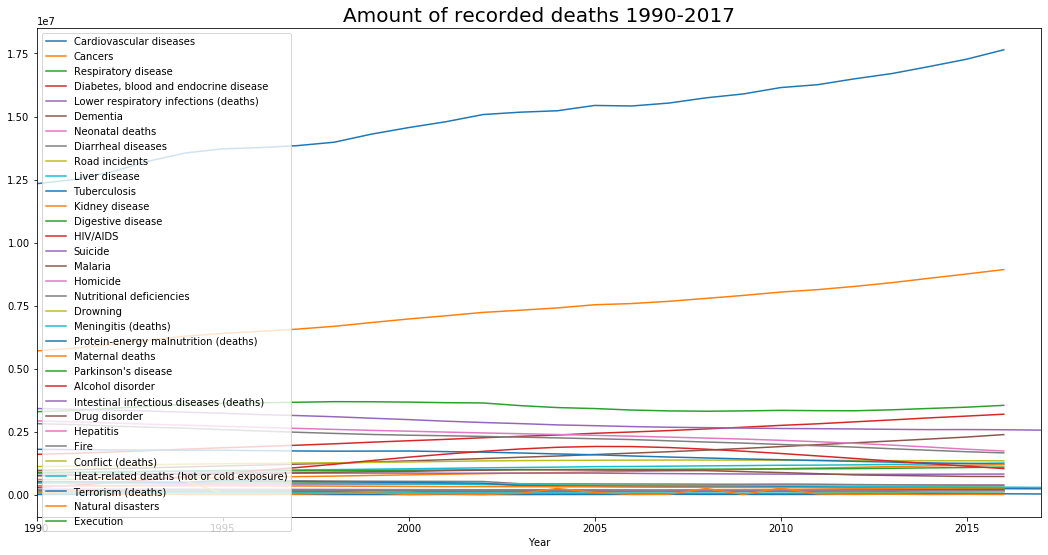

In [6]:
df.plot(x='Year', figsize=(18,9))
plt.title('Amount of recorded deaths 1990-2017', fontsize=20)

In [138]:
fig = px.line(df, x="Year",
        line_shape="spline", render_mode="svg")
fig.show()

It is clear that cardiovascular disease is by far the most common cause of death, followed by cancer, respiratory disease, ... <br> Note that cardiovascular diease is also the faster growing cause of death!

### 1.1.1 Difference between countries

Lets normalize this dataframe to obtain a ratio and not a strict number of deaths, to be able to compare between different countries.

In [261]:
# Copy the df 
normalized = data.copy()

We see that Execution are not floats but object. Lets remove this column before computing the total

In [262]:
# Check the type of the values, to see if any problems. 
normalized.dtypes

# remove the execution.
normalized = normalized.drop('Execution', 1)

# Take the colums to take into account 
column = normalized.columns.to_list()[3:]

# Compute the total 
normalized['Total'] = normalized[column].sum(axis = 1)


In [263]:
normalized.loc[ :, "Dementia" : "Terrorism (deaths)"] = normalized.loc[ :, "Dementia" : "Terrorism (deaths)"].fillna(0).div(normalized['Total'], axis = 0)

In [10]:
normalized

Entity Code  Year  Dementia  Cardiovascular diseases  \
0     Afghanistan  AFG  1990  0.006708                 0.222322   
1     Afghanistan  AFG  1991  0.006677                 0.223322   
2     Afghanistan  AFG  1992  0.006691                 0.227871   
3     Afghanistan  AFG  1993  0.006752                 0.231256   
4     Afghanistan  AFG  1994  0.006331                 0.219681   
...           ...  ...   ...       ...                      ...   
6681     Zimbabwe  ZWE  2013  0.009296                 0.099218   
6682     Zimbabwe  ZWE  2014  0.010014                 0.105632   
6683     Zimbabwe  ZWE  2015  0.010744                 0.110023   
6684     Zimbabwe  ZWE  2016  0.011585                 0.114236   
6685     Zimbabwe  ZWE  2017  0.000000                 0.000000   

      Kidney disease  Respiratory disease  Liver disease  \
0           0.021220             0.026595       0.010571   
1           0.020966             0.026775       0.010612   
2           0.021087             0.027364       0.010843   
3           0.021085             0.027856       0.010989   
4           0.019855             0.026557       0.010421   
...              ...                  ...            ...   
6681        0.011727             0.021369       0.006827   
6682        0.012613             0.022560       0.007204   
6683        0.013356             0.023452       0.007553   
6684        0.014016             0.024233       0.007862   
6685        0.000000             0.000000       0.000000   

      Diabetes, blood and endocrine disease  Digestive disease  ...  \
0                                  0.048403           0.013384  ...   
1                                  0.047962           0.013178  ...   
2                                  0.048347           0.013182  ...   
3                                  0.048484           0.013117  ...   
4                                  0.045681           0.012231  ...   
...                                     ...                ...  ...   
6681                               0.044394           0.021123  ...   
6682                               0.048202           0.022462  ...   
6683                               0.051376           0.023479  ...   
6684                               0.054342           0.024466  ...   
6685                               0.000000           0.000000  ...   

      Heat-related deaths (hot or cold exposure)  Nutritional deficiencies  \
0                                       0.001740                  0.004443   
1                                       0.001691                  0.004324   
2                                       0.001724                  0.004297   
3                                       0.001830                  0.004269   
4                                       0.001718                  0.003986   
...                                          ...                       ...   
6681                                    0.000743                  0.019341   
6682                                    0.000759                  0.020977   
6683                                    0.000882                  0.021936   
6684                                    0.000907                  0.023261   
6685                                    0.000000                  0.000000   

       Suicide  Meningitis (deaths)  Lower respiratory infections (deaths)  \
0     0.005509             0.050698                               0.178949   
1     0.005545             0.046676                               0.164180   
2     0.005656             0.045938                               0.160067   
3     0.005662             0.051103                               0.178798   
4     0.005328             0.051439                               0.178059   
...        ...                  ...                                    ...   
6681  0.012804             0.011463                               0.082555   
6682  0.013708             0.011676                               0.084

In [11]:
# Lets intereact with our data to explore it 
# Set year to 0 to show all years
@interact
def interact_normalized(year = list(np.append(normalized.Year.unique(),[0])),
                        country = list(np.append(normalized.Entity.unique(),["All"]))):
    norm = normalized
    if country != "All" : 
                        norm = norm[norm['Entity']==country] 
    if year != 0 : 
                        norm = norm[norm['Year']==year] 
            
    return norm

interactive(children=(Dropdown(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 19…

We will use Plotly to plot interactive plots as our data vary in term of country and years, it will be easyer like this. 


In [12]:
# Set year to 0 to plot over all years
@interact
def scatter_plot(x=list(normalized.select_dtypes('number').columns), 
                 y=list(normalized.select_dtypes('number').columns)[1:],
                 year = list(np.append(normalized.Year.unique(),[0])),
                 country = list(np.append(normalized.Entity.unique(),["All"])),
                 theme =list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    norm = normalized
    if country != "All" : 
                        norm = norm[norm['Entity']==country] 
    if year != 0 : 
                    norm = norm[norm['Year']==year] 
                
    norm.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='Entity',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('Year', 'Dementia', 'Cardiovascular diseases', 'Kidne…

### 1.1.2 Evolution over time

Let's look at how the prevalence and number of deaths of different diseases have changed over the years in different countries.

In [13]:
disease_change = normalized.copy()
disease_change[(disease_change.Year == 2017) | (disease_change.Year == 1990)].head()

Entity Code  Year  Dementia  Cardiovascular diseases  Kidney disease  \
0   Afghanistan  AFG  1990  0.006708                 0.222322        0.021220   
27  Afghanistan  AFG  2017  0.000000                 0.000000        0.000000   
28      Albania  ALB  1990  0.027091                 0.436518        0.016956   
55      Albania  ALB  2017  0.000000                 0.000000        0.000000   
56      Algeria  DZA  1990  0.030877                 0.340893        0.028245   

    Respiratory disease  Liver disease  Diabetes, blood and endocrine disease  \
0              0.026595       0.010571                               0.048403   
27             0.000000       0.000000                               0.000000   
28             0.049401       0.014597                               0.034485   
55             0.000000       0.000000                               0.000000   
56             0.032202       0.015781                               0.063774   

    Digestive disease  ...  Heat-related deaths (hot or cold exposure)  \
0            0.013384  ...                                    0.001740   
27           0.000000  ...                                    0.000000   
28           0.015617  ...                                    0.000319   
55           0.000000  ...                                    0.000000   
56           0.014353  ...                                    0.001137   

    Nutritional deficiencies   Suicide  Meningitis (deaths)  \
0                   0.004443  0.005509             0.050698   
27                  0.000000  0.000000             0.185693   
28                  0.002486  0.008095             0.006542   
55                  0.000000  0.000000             0.046112   
56                  0.002293  0.007576             0.006870   

    Lower respiratory infections (deaths)  \
0                                0.178949   
27                               0.604008   
28                               0.124942   
55                               0.945815   
56                               0.058068   

    Intestinal infectious diseases (deaths)  \
0                                  0.002315   
27                                 0.000000   
28                                 0.000013   
55                                 0.000000   
56                                 0.002391   

    Protein-energy malnutrition (deaths)  Conflict (deaths)  \
0                               0.012598           0.011817   
27                              0.038604           0.000000   
28                              0.002097           0.000000   
55                              0.008073           0.000000   
56                              0.002388           0.000000   

    Terrorism (deaths)          Total  
0             0.000094  127616.975442  
27            0.171695   35481.574656  
28            0.000000   15687.796748  
55            0.000000     403.517623  
56            0.000028  106391.285455  

[5 rows x 36 columns]

We see that for 2017, only the columns with (deaths) in their name have values. To be able to compare better, we use the data from 2016.

In [14]:
disease_change = normalized.copy()
disease_change[(disease_change.Year == 2016) | (disease_change.Year == 1990)].head()

Entity Code  Year  Dementia  Cardiovascular diseases  Kidney disease  \
0   Afghanistan  AFG  1990  0.006708                 0.222322        0.021220   
26  Afghanistan  AFG  2016  0.010281                 0.284500        0.028502   
28      Albania  ALB  1990  0.027091                 0.436518        0.016956   
54      Albania  ALB  2016  0.043395                 0.588953        0.017666   
56      Algeria  DZA  1990  0.030877                 0.340893        0.028245   

    Respiratory disease  Liver disease  Diabetes, blood and endocrine disease  \
0              0.026595       0.010571                               0.048403   
26             0.035139       0.014471                               0.075834   
28             0.049401       0.014597                               0.034485   
54             0.034743       0.013952                               0.031119   
56             0.032202       0.015781                               0.063774   

    Digestive disease  ...  Heat-related deaths (hot or cold exposure)  \
0            0.013384  ...                                    0.001740   
26           0.014446  ...                                    0.001583   
28           0.015617  ...                                    0.000319   
54           0.008471  ...                                    0.000226   
56           0.014353  ...                                    0.001137   

    Nutritional deficiencies   Suicide  Meningitis (deaths)  \
0                   0.004443  0.005509             0.050698   
26                  0.002252  0.007961             0.023632   
28                  0.002486  0.008095             0.006542   
54                  0.000226  0.008199             0.000851   
56                  0.002293  0.007576             0.006870   

    Lower respiratory infections (deaths)  \
0                                0.178949   
26                               0.075644   
28                               0.124942   
54                               0.016860   
56                               0.058068   

    Intestinal infectious diseases (deaths)  \
0                                  0.002315   
26                                 0.001544   
28                                 0.000013   
54                                 0.000008   
56                                 0.002391   

    Protein-energy malnutrition (deaths)  Conflict (deaths)  \
0                               0.012598           0.011817   
26                              0.004831           0.058442   
28                              0.002097           0.000000   
54                              0.000149           0.000000   
56                              0.002388           0.000000   

    Terrorism (deaths)          Total  
0             0.000094  127616.975442  
26            0.021752  282365.961232  
28            0.000000   15687.796748  
54            0.000000   22076.459184  
56            0.000028  106391.285455  

[5 rows x 36 columns]

Now we can compute the difference between 2016 and 1990.

In [15]:
diseases = normalized.columns.tolist()[3:35]

# Create a new dataframe, start with the country names and codes to be able to plot this on a map later
diseases_change = normalized[['Entity', 'Code']].drop_duplicates().set_index('Entity')

for disease in diseases:
    # Compute the difference between the mortality rates of 2016 and 1990 for every disease in every country
    diseases_change[disease] = normalized.groupby('Entity')[disease].apply(lambda x : x.tail(2).values[0] - x.head(1).values[0])
    
diseases_change

Code  Dementia  Cardiovascular diseases  \
Entity                                                              
Afghanistan                AFG  0.003573                 0.062178   
Albania                    ALB  0.016304                 0.152436   
Algeria                    DZA  0.038049                 0.075853   
American Samoa             ASM  0.000573                -0.027112   
Andean Latin America       NaN  0.000000                 0.000000   
...                        ...       ...                      ...   
Yemen                      YEM  0.006957                 0.067893   
Yugoslavia            OWID_YGS       NaN                      NaN   
Zaire                      NaN  0.000000                 0.000000   
Zambia                     ZMB  0.004232                 0.064136   
Zimbabwe                   ZWE  0.003309                -0.011435   

                      Kidney disease  Respiratory disease  Liver disease  \
Entity                                                                     
Afghanistan                 0.007282             0.008544       0.003900   
Albania                     0.000710            -0.014659      -0.000646   
Algeria                     0.015568             0.003399       0.006555   
American Samoa              0.015784            -0.018775       0.003857   
Andean Latin America        0.000000             0.000000       0.000000   
...                              ...                  ...            ...   
Yemen                       0.006958             0.003648       0.003503   
Yugoslavia                       NaN                  NaN            NaN   
Zaire                       0.000000             0.000000       0.000000   
Zambia                      0.003352             0.008052       0.011949   
Zimbabwe                    0.006635            -0.001630      -0.005295   

                      Diabetes, blood and endocrine disease  \
Entity                                                        
Afghanistan                                        0.027432   
Albania                                           -0.003366   
Algeria                                            0.042640   
American Samoa                                     0.074988   
Andean Latin America                               0.000000   
...                                                     ...   
Yemen                                              0.017656   
Yugoslavia                                              NaN   
Zaire                                              0.000000   
Zambia                                             0.014846   
Zimbabwe                                           0.027392   

                      Digestive disease  Hepatitis   Cancers  ...  \
Entity                                                        ...   
Afghanistan                    0.001062  -0.000392  0.020200  ...   
Albania                       -0.007147  -0.001649  0.036469  ...   
Algeria                        0.000103  -0.000953  0.026060  ...   
American Samoa                -0.005282   0.000000  0.032714  ...   
Andean Latin America           0.000000   0.000000  0.000000  ...   
...                                 ...        ...       ...  ...   
Yemen                         -0.001037  -0.000599  0.032421  ...   
Yugoslavia                          NaN        NaN       NaN  ...   
Zaire                          0.000000   0.000000  0.000000  ...   
Zambia                         0.010180   0.001123  0.033790  ...   
Zimbabwe                       0.011037   0.000267  0.004166  ...   

                      Diarrheal diseases  \
Entity                                     
Afghanistan                    -0.014331   
Albania                        -0.005739   
Algeria                        -0.009130   
American Samoa                 -0.006212   
Andean Latin America            0.000000   
...                                  ...   
Yemen                          -0.122561   
Yugoslavia               

Let us zoom in on cardiovascular diseases and visualise this. First, we saw that this difference could not be computed for every country, so let's drop those who generated a NaN.

In [16]:
diseases_change = diseases_change.dropna(subset=['Cardiovascular diseases'])
diseases_change

Code  Dementia  Cardiovascular diseases  \
Entity                                                              
Afghanistan                AFG  0.003573                 0.062178   
Albania                    ALB  0.016304                 0.152436   
Algeria                    DZA  0.038049                 0.075853   
American Samoa             ASM  0.000573                -0.027112   
Andean Latin America       NaN  0.000000                 0.000000   
...                        ...       ...                      ...   
World                 OWID_WRL  0.022793                 0.049485   
Yemen                      YEM  0.006957                 0.067893   
Zaire                      NaN  0.000000                 0.000000   
Zambia                     ZMB  0.004232                 0.064136   
Zimbabwe                   ZWE  0.003309                -0.011435   

                      Kidney disease  Respiratory disease  Liver disease  \
Entity                                                                     
Afghanistan                 0.007282             0.008544       0.003900   
Albania                     0.000710            -0.014659      -0.000646   
Algeria                     0.015568             0.003399       0.006555   
American Samoa              0.015784            -0.018775       0.003857   
Andean Latin America        0.000000             0.000000       0.000000   
...                              ...                  ...            ...   
World                       0.008582            -0.008640       0.004259   
Yemen                       0.006958             0.003648       0.003503   
Zaire                       0.000000             0.000000       0.000000   
Zambia                      0.003352             0.008052       0.011949   
Zimbabwe                    0.006635            -0.001630      -0.005295   

                      Diabetes, blood and endocrine disease  \
Entity                                                        
Afghanistan                                        0.027432   
Albania                                           -0.003366   
Algeria                                            0.042640   
American Samoa                                     0.074988   
Andean Latin America                               0.000000   
...                                                     ...   
World                                              0.023363   
Yemen                                              0.017656   
Zaire                                              0.000000   
Zambia                                             0.014846   
Zimbabwe                                           0.027392   

                      Digestive disease  Hepatitis   Cancers  ...  \
Entity                                                        ...   
Afghanistan                    0.001062  -0.000392  0.020200  ...   
Albania                       -0.007147  -0.001649  0.036469  ...   
Algeria                        0.000103  -0.000953  0.026060  ...   
American Samoa                -0.005282   0.000000  0.032714  ...   
Andean Latin America           0.000000   0.000000  0.000000  ...   
...                                 ...        ...       ...  ...   
World                          0.000276  -0.001155  0.037360  ...   
Yemen                         -0.001037  -0.000599  0.032421  ...   
Zaire                          0.000000   0.000000  0.000000  ...   
Zambia                         0.010180   0.001123  0.033790  ...   
Zimbabwe                       0.011037   0.000267  0.004166  ...   

                      Diarrheal diseases  \
Entity                                     
Afghanistan                    -0.014331   
Albania                        -0.005739   
Algeria                        -0.009130   
American Samoa                 -0.006212   
Andean Latin America            0.000000   
...                                  ...   
World                          -0.033195   
Yemen                    

Let's visualise this data on a map.

Inspiration for this code and source for the shapefile: https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [211]:
shapefile = 'data/countries_110m/ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [212]:
diseases_changed_map = gdf.merge(diseases_change, left_on = 'country_code', right_on = 'Code', how = 'left')

In [19]:
#Read data to json
diseases_changed_map_json = json.loads(diseases_changed_map.to_json())

#Convert to str like object
diseases_changed_map_json_data = json.dumps(diseases_changed_map_json)

In [20]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = diseases_changed_map_json_data)

#Define a sequential multi-hue color palette.
palette = brewer['PuOr'][7]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = -0.2, high = 0.2)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '1': '1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6','7':'7'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=7,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Change between 1990 and 2016 in proportion of total deaths by cardiovascular diseases', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Cardiovascular diseases', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

In general we see that cardiovascular disease is becoming more prevelent in developing countries while its prevelence is decreasing in developed countries.
Note that Syria is a clear outlier in the Middle East, this may very well be a result of war. <br>
These are very interesting metrics to further analyse in questions 2 and 3 (risk factors). 

To be able to do this, the difference should first be computed for all diseases in all countries, and we should make sure that the values all make sense (i.e. make sure there are no missing values, or that they are handled well).

## 1.2 Ratio of cardiovascular disease over cancer

Another interesting question, is what the ratio between different types of diseases is in different countries. We know, for example, that cardiovascular diseases and cancer cause the most deaths of all diseases, especially in the industrialised world. However, is one more prevalent than the other in some countries? 

In [141]:
datafile = 'data/annual-number-of-deaths-by-cause.csv'
df = pd.read_csv(datafile)

df = df[['Code','Year','Cardiovascular diseases','Cancers']]
df['ratio'] = df['Cardiovascular diseases'] / df['Cancers']
df.head()

Code  Year  Cardiovascular diseases  Cancers     ratio
0  AFG  1990                  28372.0   6483.0  4.376369
1  AFG  1991                  30368.0   6912.0  4.393519
2  AFG  1992                  33035.0   7495.0  4.407605
3  AFG  1993                  36512.0   8218.0  4.442930
4  AFG  1994                  40285.0   8978.0  4.487080

In [22]:
df_2016 = df[df['Year'] == 2016]

We visualise this on a map, as that is the easiest way to see this data for all the countries together.

In [23]:
merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'Code', how = 'left')
merged.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry Code    Year  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  FJI  2016.0   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  TZA  2016.0   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  NaN     NaN   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  CAN  2016.0   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  USA  2016.0   

   Cardiovascular diseases   Cancers     ratio  
0                   2754.0     791.0  3.481669  
1                  57112.0   32183.0  1.774601  
2                      NaN       NaN       NaN  
3                  81352.0   85102.0  0.955935  
4                 901411.0  685162.0  1.315617

In [24]:
#Read data to json
merged_json = json.loads(merged.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)

In [25]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][7]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 7)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '1': '1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6','7':'7'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=7,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Ratio of cardiovascular disease to cancer, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'ratio', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

There do seem to be significant differences in this ratio between countries. This should also be taken into account in questions 3 and 4, and the analysis should be repeated for other diseases as well. Perhaps the change over time can also give interesting insights. In most countries cardiovascular disease is more prevelant, but there is exceptions (Canada, France, Japan, ...)

## 1.3 Years of Life Lost

The Global Burden of Diseases dataset also contains a number of other interesting measures to see the impact of diseases on people. Let's look at one of them: Years of Life Lost (YYLs). According to the description of the dataset, this is the definition of this measure:

>Years of life lost due to premature mortality. YLLs are the multiplication of deaths and a standard life expectancy at the age of death. The standard life expectancy is derived from a life table that contains the lowest observed mortality rate at each age that has been observed in any population greater than 5 million.

To get these values, we run a new query to the GBD database to get the values for this measure, and for a few others as well, and load this data.

In [26]:
data2=pd.read_csv("data/gbd_deaths_and_others.csv" )
print(data2.shape)
data2.head(5)

(76050, 10)


measure    location   sex       age  \
0  Deaths     Ukraine  Both  All Ages   
1  Deaths     Ukraine  Both  All Ages   
2  Deaths     Ukraine  Both  All Ages   
3  Deaths  Luxembourg  Both  All Ages   
4  Deaths  Luxembourg  Both  All Ages   

                                     cause   metric  year        val  \
0  Neglected tropical diseases and malaria   Number  2017  27.649617   
1  Neglected tropical diseases and malaria  Percent  2017   0.000040   
2  Neglected tropical diseases and malaria     Rate  2017   0.061871   
3                       Transport injuries   Number  2017  40.291536   
4                       Transport injuries  Percent  2017   0.009120   

       upper      lower  
0  33.175132  20.860831  
1   0.000048   0.000030  
2   0.074235   0.046680  
3  44.766519  36.314611  
4   0.009760   0.008574

Let's look at all the different diseases included in this dataset.

In [27]:
data2['cause'].unique().tolist()

['Neglected tropical diseases and malaria',
 'Transport injuries',
 'Neoplasms',
 'Other non-communicable diseases',
 'Skin and subcutaneous diseases',
 'Mental disorders',
 'Unintentional injuries',
 'Musculoskeletal disorders',
 'Other infectious diseases',
 'Maternal and neonatal disorders',
 'Substance use disorders',
 'Diabetes and kidney diseases',
 'Cardiovascular diseases',
 'Chronic respiratory diseases',
 'Nutritional deficiencies',
 'Self-harm and interpersonal violence',
 'Digestive diseases',
 'HIV/AIDS and sexually transmitted infections',
 'Respiratory infections and tuberculosis',
 'Enteric infections',
 'Neurological disorders',
 'Sense organ diseases']

We see that the disease categories in this dataset are not the same as in the previous one. The GBD query tool allows to extract values at for very specific diseases, or more aggregated categories of diseases. When performing future analyses, we have to decide which set of disease categories to choose.

Let us now look at the different measures included in the dataset.

In [28]:
data2['measure'].unique().tolist()

['Deaths',
 'DALYs (Disability-Adjusted Life Years)',
 'Incidence',
 'YLDs (Years Lived with Disability)',
 'YLLs (Years of Life Lost)',
 'Prevalence']

Let's look at the Years of Life Lost. To decide which metric (absolute number, percentage or rate) to take, we compare the values of these metrics for the same disease in two countries which are close to each other, but have a different population.

In [29]:
data2[(data2.measure == 'YLLs (Years of Life Lost)') & (data2.cause == 'Neoplasms') & ((data2.location == 'Luxembourg')|(data2.location == 'Netherlands'))]

measure     location   sex       age      cause  \
40943  YLLs (Years of Life Lost)   Luxembourg  Both  All Ages  Neoplasms   
40944  YLLs (Years of Life Lost)   Luxembourg  Both  All Ages  Neoplasms   
40945  YLLs (Years of Life Lost)   Luxembourg  Both  All Ages  Neoplasms   
59415  YLLs (Years of Life Lost)  Netherlands  Both  All Ages  Neoplasms   
59416  YLLs (Years of Life Lost)  Netherlands  Both  All Ages  Neoplasms   
59417  YLLs (Years of Life Lost)  Netherlands  Both  All Ages  Neoplasms   

        metric  year            val          upper          lower  
40943   Number  2017   24719.846391   26942.056844   22658.815482  
40944  Percent  2017       0.362265       0.371621       0.350915  
40945     Rate  2017    4185.926360    4562.223573    3836.922427  
59415   Number  2017  938823.389505  993245.867184  886666.298582  
59416  Percent  2017       0.415261       0.421762       0.405521  
59417     Rate  2017    5513.054268    5832.639480    5206.772089

We will work with the rate of YLLs over the population (instead of the total number, or the percentage of all years of life lost for diseases), so we can compare the impact of different diseases in different countries.

Now, we can visualise this data on a map.

In [30]:
def plot_map(dataset, title_string = ""):
    dataset = gdf.merge(dataset, left_on = 'country', right_on = 'location', how = 'left')

    #Read data to json
    dataset_json = json.loads(dataset.to_json())

    #Convert to str like object
    dataset_json_data = json.dumps(dataset_json)

    #Input GeoJSON source that contains features for plotting.
    geosource = GeoJSONDataSource(geojson = dataset_json_data)

    #Define a sequential multi-hue color palette.
    palette = brewer['OrRd'][7]
    
    #Reverse color order so that dark blue is highest obesity.
    palette = palette[::-1]

    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = dataset.val.min(), high = dataset.val.max())

    #Define custom tick labels for color bar.
    #tick_labels = {'0': '0', '1': '1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6','7':'7'}

    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=7,width = 500, height = 20,
    border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

    #Create figure object.
    p = figure(title = title_string, plot_height = 600 , plot_width = 950, toolbar_location = None)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    #Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource,fill_color = {'field' :'val', 'transform' : color_mapper},
              line_color = 'black', line_width = 0.25, fill_alpha = 1)

    #Specify figure layout.
    p.add_layout(color_bar, 'below')

    #Display figure inline in Jupyter Notebook.
    output_notebook()

    #Display figure.
    show(p)

In [31]:
# Lets intereact with our data to explore it 
@interact
def interact_yll(year = list(np.append(data2.year.unique(),[0])),
                        disease = list(np.append(data2.cause.unique(), [0]))):
    yll_subset = data2
    yll_subset = data2[(data2['year']==year) & (data2['cause'] == disease) & (data2['metric'] == 'Rate') & (data2['measure'] == 'YLLs (Years of Life Lost)')][['location','val']]
    
    plot_map(yll_subset)
    
    return yll_subset

interactive(children=(Dropdown(description='year', options=(2017, 0), value=2017), Dropdown(description='disea…

In [142]:
map_test = gdf.merge(df, left_on = 'country_code', right_on = 'Code', how = 'left')
map_test.head()

country country_code                                           geometry  \
0    Fiji          FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1    Fiji          FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
2    Fiji          FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
3    Fiji          FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
4    Fiji          FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   

  Code    Year  Cardiovascular diseases  Cancers     ratio  
0  FJI  1990.0                   1591.0    388.0  4.100515  
1  FJI  1991.0                   1636.0    397.0  4.120907  
2  FJI  1992.0                   1683.0    405.0  4.155556  
3  FJI  1993.0                   1744.0    414.0  4.212560  
4  FJI  1994.0                   1803.0    422.0  4.272512

In [140]:
import plotly.graph_objects as go

In [239]:
def slider_map(df, z_col_name, title, country_col_name = 'country', zmin = 0, zmax = 10,  year_col = 'Year' , location_col_name ='Code' ):
    data_slider = []
    years = sorted(df[year_col].unique())
    for year in sorted(df[year_col].unique()):


        # I select the year (and remove DC for now)
        df_year = map_test[(df[year_col]== year )]

        ### create the dictionary with the data for the current year
        data_one_year = dict(
                            type='choropleth',
                            locations = df_year[location_col_name],
                            z=df_year[z_col_name],
                            zmin=zmin,
                            zmax = zmax,
                            colorscale = "Reds",
                            autocolorscale=False,
                            reversescale=False,
                            marker_line_color='black',
                            marker_line_width=0.5,
                            text = df_year[country_col_name],
                            colorbar_title= title ,
                            )

        data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider
    ##  I create the steps for the slider

    steps = []

    for i in range(len(data_slider)):
        step = dict(method='restyle',
                    args=['visible', [False] * len(data_slider)],
                    label='Year {}'.format(int(years[i]))) # label to be displayed for each step (year)
        step['args'][1][i] = True
        steps.append(step)


    ##  I create the 'sliders' object from the 'steps' 

    sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

    # I set up the layout (including slider option)


    # I create the figure object:

    fig = go.Figure(data=data_slider)

    # to plot in the notebook

    #plotly.offline.iplot(fig)
    fig.update_layout(geo=dict(showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'),
        sliders=sliders,
        template="plotly_white"
    )
    fig.show()

In [227]:
#map_test_2  = map_test.loc[map_test['Year'].notnull(), ['Age','Fare', 'Group_Size','deck', 'Pclass', 'Title' ]]
map_test.dropna(subset=['Year'], axis = 0, inplace= True)

In [240]:
slider_map(map_test, z_col_name = "ratio", title = "Test") 

Not all countries are correctly linked to their shape on the map in this visualisation: this still has to be fixed.

We can see very interesting clusters of countries pop up for different diseases, i.e. for neoplasms (cancers), neglected tropical diseases and malaria, substance abuse disorders, and more. This is clearly an interesting measure to look at.

What still has to be done:
* Compare the different measures and choose which ones will be used for future analyses.
* Extend the analyses of all measures to look at the evolution over time (this was not yet done for the YLL).
* Decide on a set of disease categories to analyse. Thoroughly check this dataset to make sure any more needed cleaning and wrangling is done.
* Fix the visualisation so that all countries are correctly visualised. Add a slider to more easily see the evolution over time.

Then, more substantive analyses can be made:
* Which diseases have the largest impact on the different countries? Look at a top 1,2,3...? This information can then be used to steer the analysis for the next research questions.

# 3. How is this linked to the living conditions within each country?

## 3.1 Economics

Gather economical data and merge them to the dataset and continue exploration with this dataset (to find links)

In [256]:
economic = pd.read_csv("data/gdp_capita.csv")
exploded = economic.melt(id_vars=economic.columns.to_list()[0: 4], 
        var_name="Year", 
        value_name="GDP").drop(["Indicator Name","Indicator Code" ], 1)
exploded['Year'] = pd.to_numeric(exploded['Year'],errors='coerce')
exploded


Country Name Country Code    Year        GDP
0             Aruba          ABW  1960.0        NaN
1       Afghanistan          AFG  1960.0  59.773194
2            Angola          AGO  1960.0        NaN
3           Albania          ALB  1960.0        NaN
4           Andorra          AND  1960.0        NaN
...             ...          ...     ...        ...
16099        Kosovo          XKX     NaN        NaN
16100   Yemen, Rep.          YEM     NaN        NaN
16101  South Africa          ZAF     NaN        NaN
16102        Zambia          ZMB     NaN        NaN
16103      Zimbabwe          ZWE     NaN        NaN

[16104 rows x 4 columns]

In [257]:
life_expect = pd.read_csv("data/life_expect.csv")
life_expect_exploded = life_expect.melt(id_vars=life_expect.columns.to_list()[0: 4], 
        var_name="Year", 
        value_name="Life_expectancy").drop(["Indicator Name","Indicator Code" ], 1)
life_expect_exploded['Year'] = pd.to_numeric(life_expect_exploded['Year'],errors='coerce')
life_expect_exploded

Country Name Country Code    Year  Life_expectancy
0             Aruba          ABW  1960.0           65.662
1       Afghanistan          AFG  1960.0           32.446
2            Angola          AGO  1960.0           37.524
3           Albania          ALB  1960.0           62.283
4           Andorra          AND  1960.0              NaN
...             ...          ...     ...              ...
16099        Kosovo          XKX     NaN              NaN
16100   Yemen, Rep.          YEM     NaN              NaN
16101  South Africa          ZAF     NaN              NaN
16102        Zambia          ZMB     NaN              NaN
16103      Zimbabwe          ZWE     NaN              NaN

[16104 rows x 4 columns]

In [258]:
mortality = pd.read_csv("data/child_mortality.csv")
mortality_exploded = mortality.melt(id_vars=mortality.columns.to_list()[0: 4], 
        var_name="Year", 
        value_name="Mortality").drop(["Indicator Name","Indicator Code" ], 1)
mortality_exploded['Year'] = pd.to_numeric(mortality_exploded['Year'],errors='coerce')
mortality_exploded

Country Name Country Code    Year  Mortality
0             Aruba          ABW  1960.0        NaN
1       Afghanistan          AFG  1960.0        NaN
2            Angola          AGO  1960.0        NaN
3           Albania          ALB  1960.0        NaN
4           Andorra          AND  1960.0        NaN
...             ...          ...     ...        ...
16099        Kosovo          XKX     NaN        NaN
16100   Yemen, Rep.          YEM     NaN        NaN
16101  South Africa          ZAF     NaN        NaN
16102        Zambia          ZMB     NaN        NaN
16103      Zimbabwe          ZWE     NaN        NaN

[16104 rows x 4 columns]

In [259]:
health_expend = pd.read_csv("data/health_expend.csv")
health_expend_exploded = health_expend.melt(id_vars=health_expend.columns.to_list()[0: 4], 
        var_name="Year", 
        value_name="Health expand").drop(["Indicator Name","Indicator Code" ], 1)
health_expend_exploded['Year'] = pd.to_numeric(health_expend_exploded['Year'],errors='coerce')
health_expend_exploded

Country Name Country Code    Year  Health expand
0             Aruba          ABW  1960.0            NaN
1       Afghanistan          AFG  1960.0            NaN
2            Angola          AGO  1960.0            NaN
3           Albania          ALB  1960.0            NaN
4           Andorra          AND  1960.0            NaN
...             ...          ...     ...            ...
16099        Kosovo          XKX     NaN            NaN
16100   Yemen, Rep.          YEM     NaN            NaN
16101  South Africa          ZAF     NaN            NaN
16102        Zambia          ZMB     NaN            NaN
16103      Zimbabwe          ZWE     NaN            NaN

[16104 rows x 4 columns]

In [297]:
regions = pd.read_csv("data/all.csv")
region_columns = ['alpha-3','region','sub-region', 'intermediate-region']
regions = regions[region_columns]

To merge it with our dataframe we need to explode the years

In [298]:
merged = pd.merge(normalized, exploded, how = "inner", left_on = ["Code", "Year"], right_on=["Country Code","Year"])
merged.drop(["Country Code", "Country Name"], axis = 1, inplace = True)
merged = pd.merge(merged, life_expect_exploded, how = "inner", left_on = ["Code", "Year"], right_on=["Country Code","Year"])
merged.drop(["Country Code", "Country Name"], axis = 1, inplace = True)
merged = pd.merge(merged, mortality_exploded, how = "inner", left_on = ["Code", "Year"], right_on=["Country Code","Year"])
merged.drop(["Country Code", "Country Name"], axis = 1, inplace = True)
merged["Mortality"] = merged["Mortality"]/1000
merged  = pd.merge(merged, health_expend_exploded, how = "inner", left_on = ["Code", "Year"], right_on=["Country Code","Year"])
merged.drop(["Country Code", "Country Name"], axis = 1, inplace = True)
merged = pd.merge(merged, regions, how = "inner", left_on = ["Code"], right_on=["alpha-3"])
merged.drop(["alpha-3"], axis = 1, inplace = True)
merged


Entity Code  Year  Dementia  Cardiovascular diseases  \
0     Afghanistan  AFG  1990  0.006708                 0.222322   
1     Afghanistan  AFG  1991  0.006677                 0.223322   
2     Afghanistan  AFG  1992  0.006691                 0.227871   
3     Afghanistan  AFG  1993  0.006752                 0.231256   
4     Afghanistan  AFG  1994  0.006331                 0.219681   
...           ...  ...   ...       ...                      ...   
5440     Zimbabwe  ZWE  2013  0.009296                 0.099218   
5441     Zimbabwe  ZWE  2014  0.010014                 0.105632   
5442     Zimbabwe  ZWE  2015  0.010744                 0.110023   
5443     Zimbabwe  ZWE  2016  0.011585                 0.114236   
5444     Zimbabwe  ZWE  2017  0.000000                 0.000000   

      Kidney disease  Respiratory disease  Liver disease  \
0           0.021220             0.026595       0.010571   
1           0.020966             0.026775       0.010612   
2           0.021087             0.027364       0.010843   
3           0.021085             0.027856       0.010989   
4           0.019855             0.026557       0.010421   
...              ...                  ...            ...   
5440        0.011727             0.021369       0.006827   
5441        0.012613             0.022560       0.007204   
5442        0.013356             0.023452       0.007553   
5443        0.014016             0.024233       0.007862   
5444        0.000000             0.000000       0.000000   

      Diabetes, blood and endocrine disease  Digestive disease  ...  \
0                                  0.048403           0.013384  ...   
1                                  0.047962           0.013178  ...   
2                                  0.048347           0.013182  ...   
3                                  0.048484           0.013117  ...   
4                                  0.045681           0.012231  ...   
...                                     ...                ...  ...   
5440                               0.044394           0.021123  ...   
5441                               0.048202           0.022462  ...   
5442                               0.051376           0.023479  ...   
5443                               0.054342           0.024466  ...   
5444                               0.000000           0.000000  ...   

      Conflict (deaths)  Terrorism (deaths)          Total          GDP  \
0              0.011817            0.000094  127616.975442          NaN   
1              0.025724            0.000500  135982.791609          NaN   
2              0.029944            0.000338  144972.493876          NaN   
3              0.000000            0.000000  157885.888544          NaN   
4              0.049569            0.000120  183379.191047          NaN   
...                 ...                 ...            ...          ...   
5440           0.000000            0.000006  158781.429228  1430.000818   
5441           0.000000            0.000000  151592.446930  1434.899340   
5442           0.000000            0.000000  145105.777215  1445.071062   
5443           0.000000            0.000000  141050.060551  1464.583529   
5444           0.000000            0.000000   17158.535537  1602.403507   

      Life_expectancy  Mortality  Health expand  region          sub-region  \
0              50.331     0.1788            NaN    Asia       Southern Asia   
1              50.999     0.1726            NaN    Asia       Southern Asia   
2              51.641     0.1667            NaN    Asia       Southern Asia   
3              52.256     0.1611            NaN    Asia       Southern Asia   
4              52.842     0.1558            NaN    Asia       Southern Asia   
...               ...        ...            ...     ...                 ...   
5440           56.897     0.0623       6.592539  Africa  Sub-Saharan Africa   
5441           58.410     0.0575       8.670390  Africa  Sub-Saharan Africa   
5442           59.53

In [280]:
merged.dropna(subset=['GDP', "Year", "Code"], axis = 0, inplace= True)
merged = merged2.sort_values(["Year","Entity", ])
merged

In [295]:
import plotly.express as px
px.scatter(merged, x="Diabetes, blood and endocrine disease", y="Life_expectancy", animation_frame="Year", animation_group="Entity",
           size="GDP",color="sub-region", hover_name="Entity", template= "plotly_white",
           log_x=False, size_max=55)

In [296]:
import plotly.express as px
px.scatter(merged2, x="GDP", y="Life_expectancy", animation_frame="Year", animation_group="Entity",
           color="sub-region", hover_name="Entity", template= "plotly_white",
           log_x=False, size_max=55)

In [108]:
fig = px.choropleth(merged2, locations="Code", color="GDP", hover_name="Entity", animation_frame="Year", range_color=[0,100000])
fig.show()

This does not seem to provide very clear conclusions yet. What can still be done:
* Perform statistical analyses on this data (e.g. look for a correlation).
* Look for other data on the living conditions of a country (e.g. HDI, Gini inequality index, government health budget)
* Try to cluster countries which exhibit similar characteristics.

## Plotly code to display nice graphs 


### Maps 
https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

### More simple graph 

### With a slider for years 


Also merge countries to regions ? Or I dont know 
